# Level3

## Task1: Predictive Modeling

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('cognifyz dataset.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [6]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

In [7]:
X = df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery']]
y = df['Aggregate rating']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [13]:
linear_reg_mse, linear_reg_r2 = evaluate_model(linear_reg, X_test, y_test)
decision_tree_mse, decision_tree_r2 = evaluate_model(decision_tree_reg, X_test, y_test)
random_forest_mse, random_forest_r2 = evaluate_model(random_forest_reg, X_test, y_test)

print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')
print(f'Decision Tree - MSE: {decision_tree_mse}, R-squared: {decision_tree_r2}')
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')

Linear Regression - MSE: 2.09781715516153, R-squared: 0.07833185313490243
Decision Tree - MSE: 3.2696037821966395, R-squared: -0.4364882332598976
Random Forest - MSE: 2.011758550763726, R-squared: 0.11614138016730635


C:\Users\vamak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


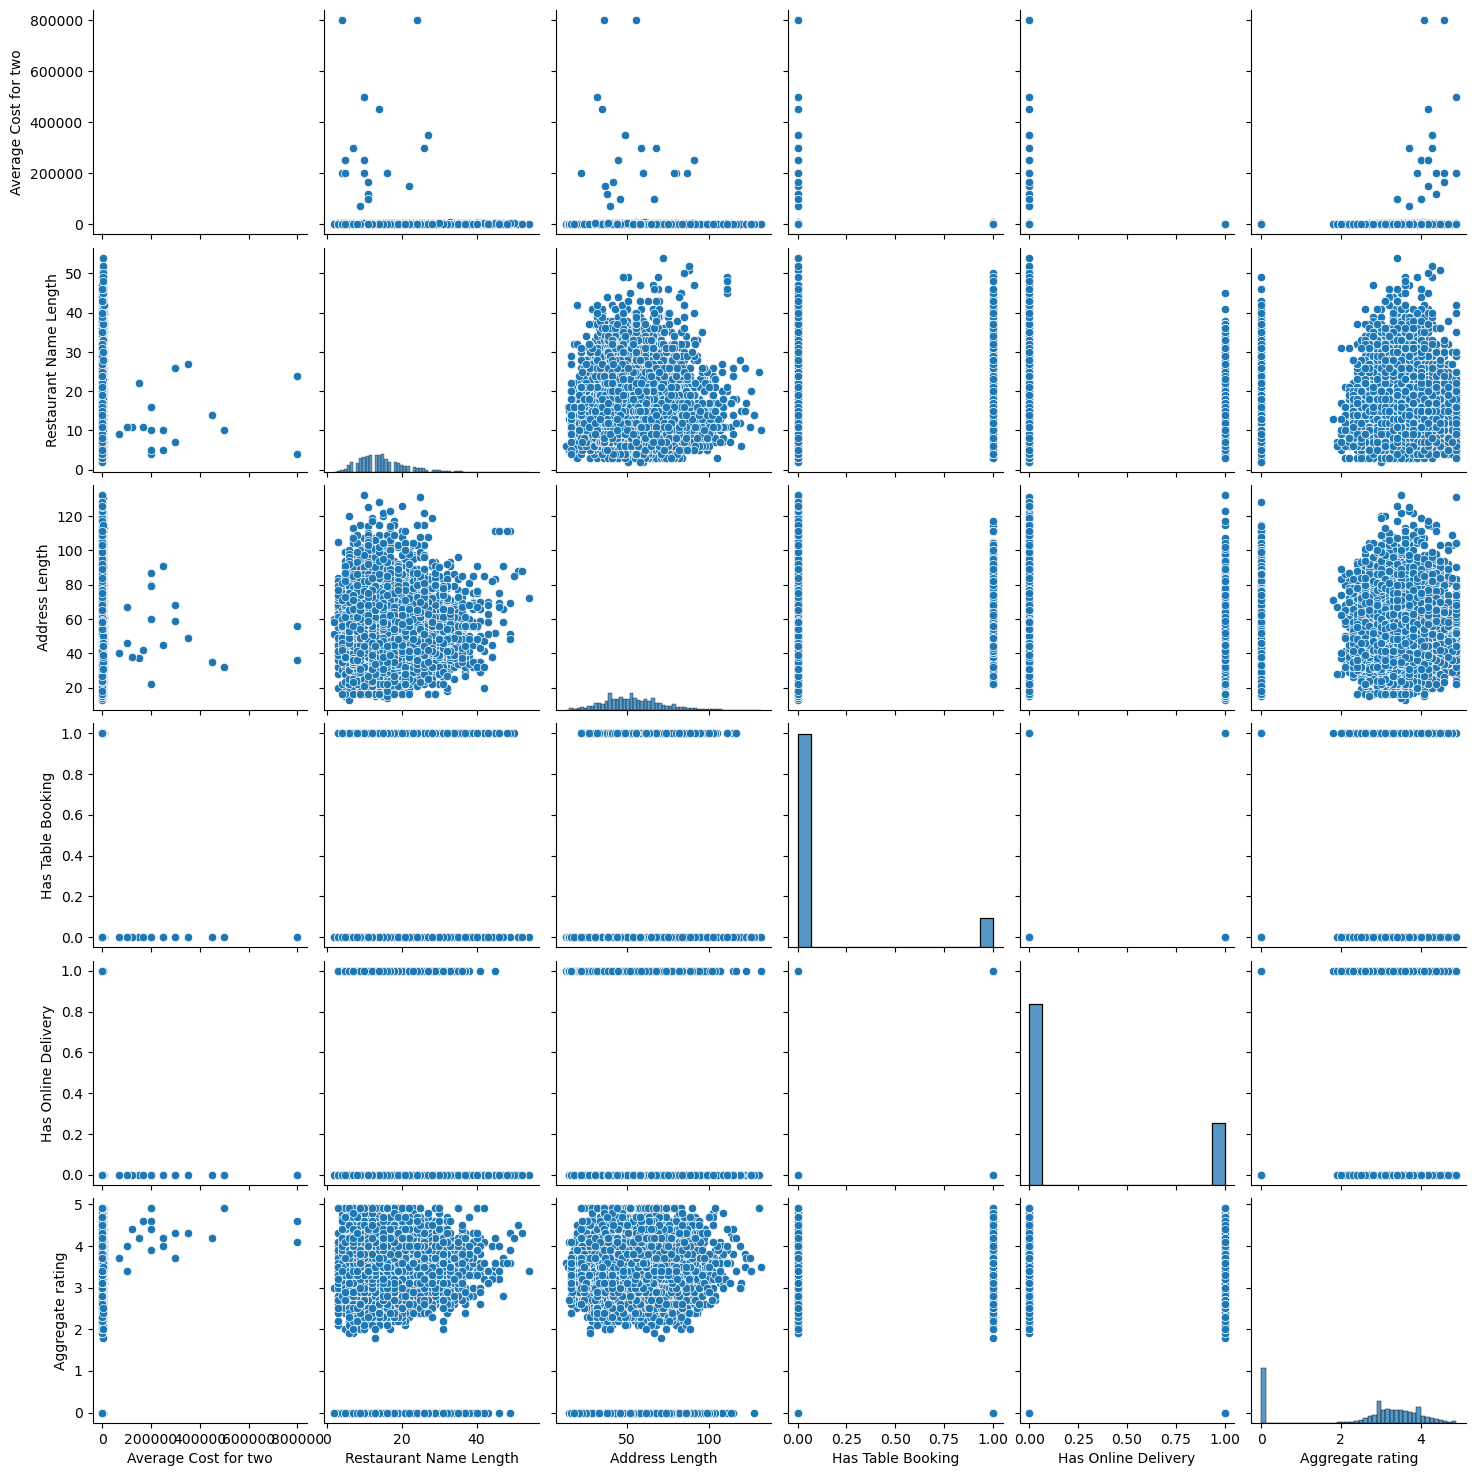

In [14]:
sns.pairplot(df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery', 'Aggregate rating']])
plt.show()

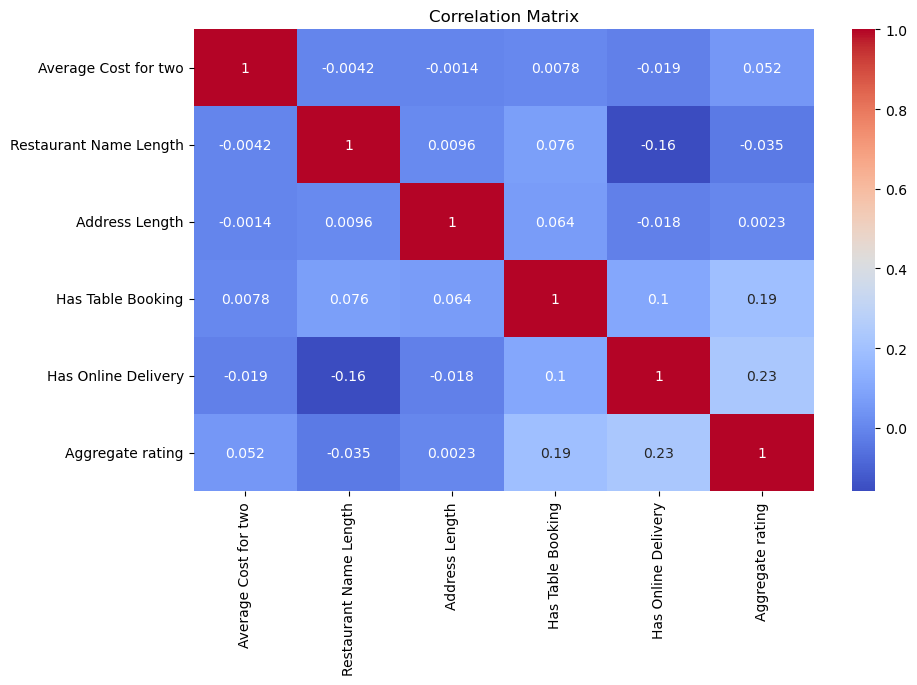

In [15]:
corr = df[['Average Cost for two', 'Restaurant Name Length', 'Address Length', 'Has Table Booking', 'Has Online Delivery', 'Aggregate rating']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
y_pred_linear = linear_reg.predict(X_test)
y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_random_forest = random_forest_reg.predict(X_test)

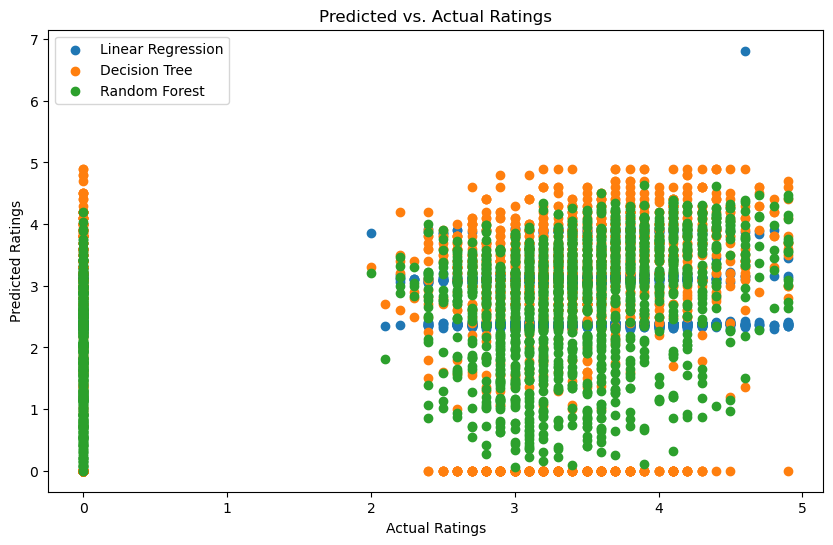

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, label='Linear Regression')
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree')
plt.scatter(y_test, y_pred_random_forest, label='Random Forest')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.title('Predicted vs. Actual Ratings')
plt.show()

## Task2: Customer Preference Analysis

In [18]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


In [19]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Restaurant Name Length,Address Length,Has Table Booking,Has Online Delivery
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748,15.164171,53.536698,0.121244,0.256622
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145,6.858392,17.122035,0.326428,0.436792
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,2.000000,13.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000,10.000000,41.000000,0.000000,0.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000,14.000000,52.000000,0.000000,0.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000,19.000000,64.000000,0.000000,1.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,54.000000,132.000000,1.000000,1.000000


In [20]:
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

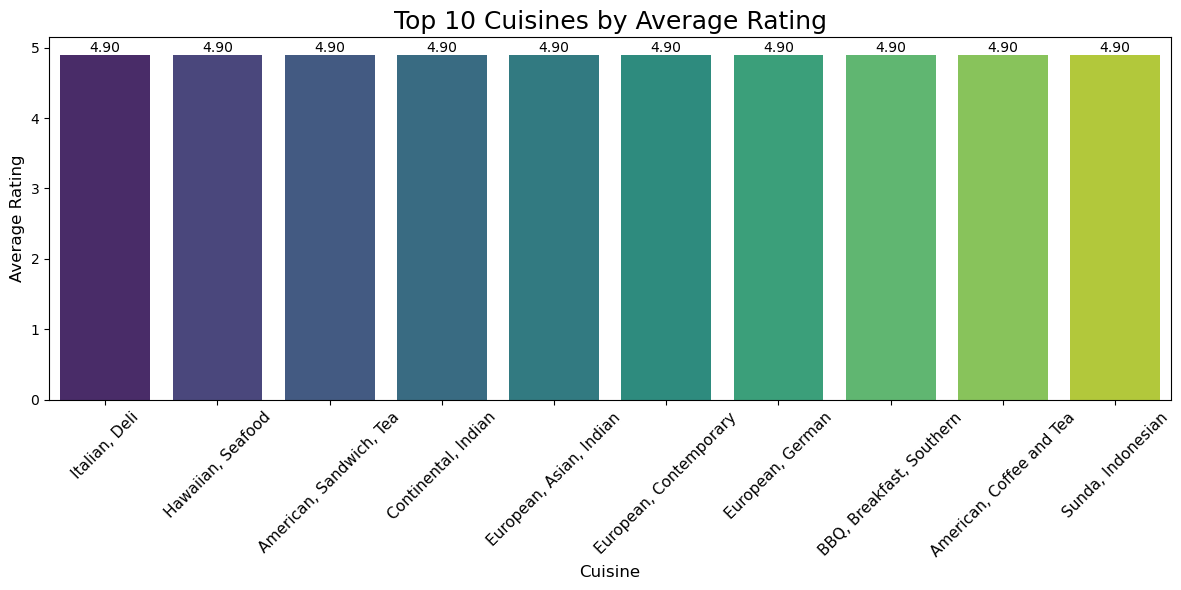

In [21]:
top_cuisines = cuisine_rating.head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Cuisines by Average Rating', fontsize=18)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.tight_layout()
plt.show()

In [22]:
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

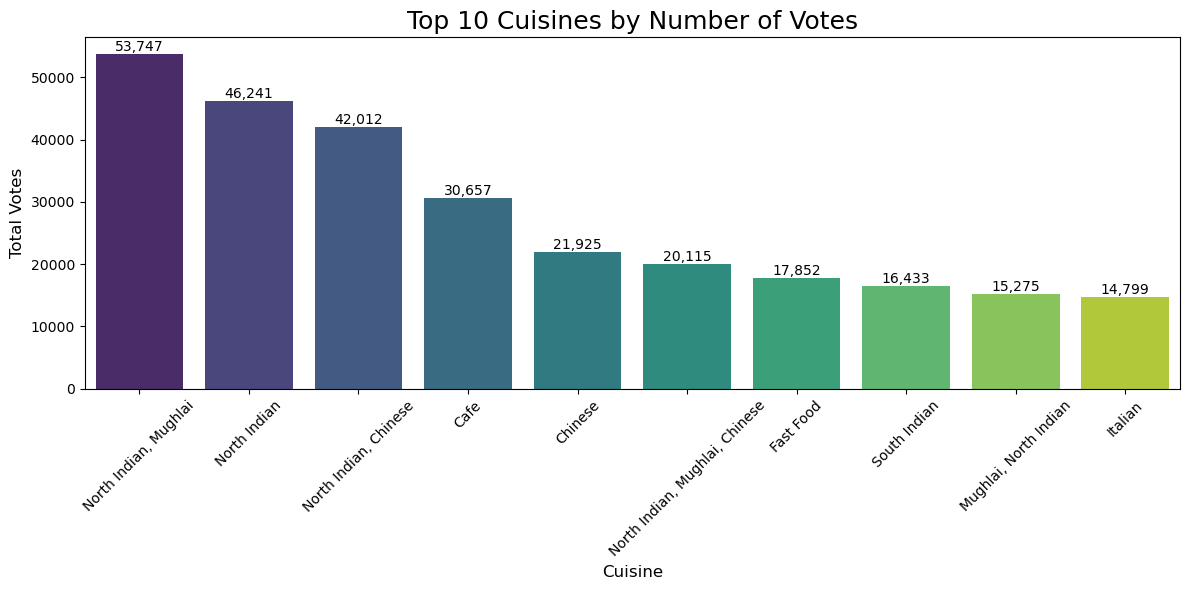

In [23]:
top_cuisines = cuisine_votes.head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Cuisines by Number of Votes', fontsize=18)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
cuisine_mean_rating = df.groupby('Cuisines')['Aggregate rating'].mean()

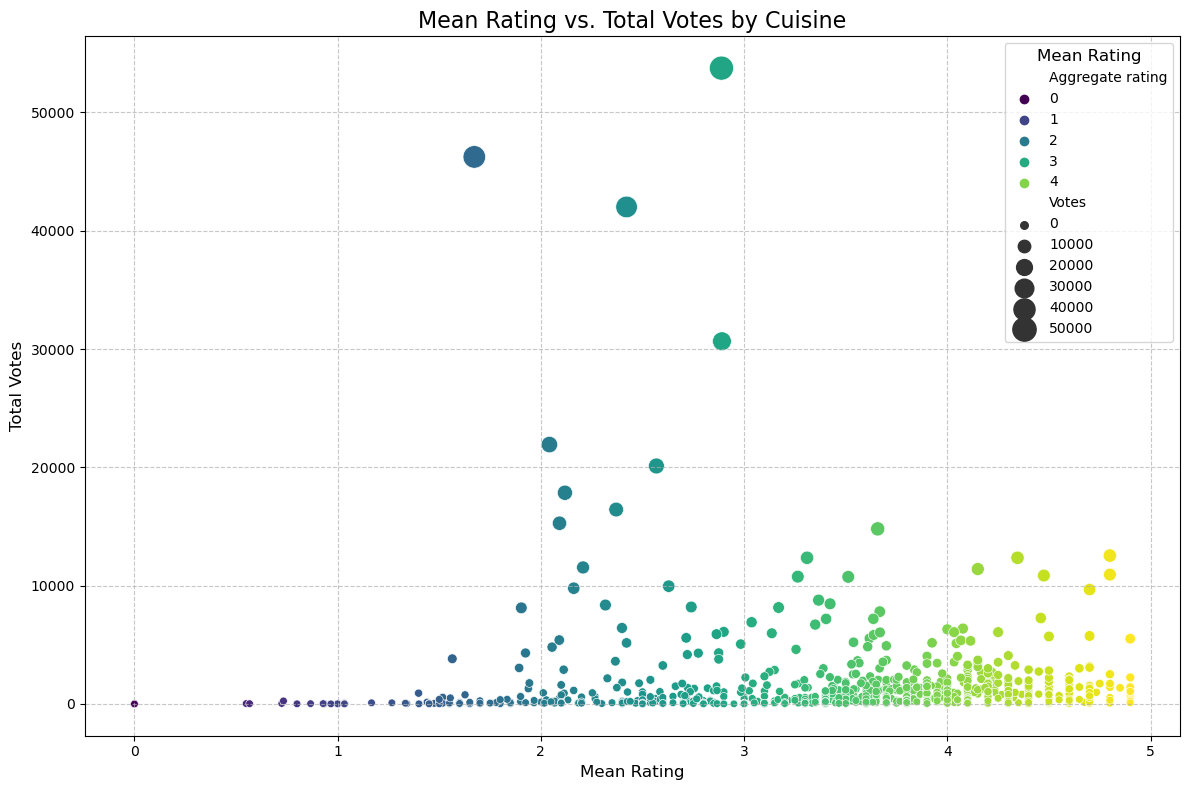

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=cuisine_mean_rating, y=cuisine_votes, hue=cuisine_mean_rating, palette='viridis', size=cuisine_votes, sizes=(30, 300))
plt.title('Mean Rating vs. Total Votes by Cuisine', fontsize=16)
plt.xlabel('Mean Rating', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.legend(title='Mean Rating', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
price_range_rating = df.groupby('Price range')['Aggregate rating'].mean()

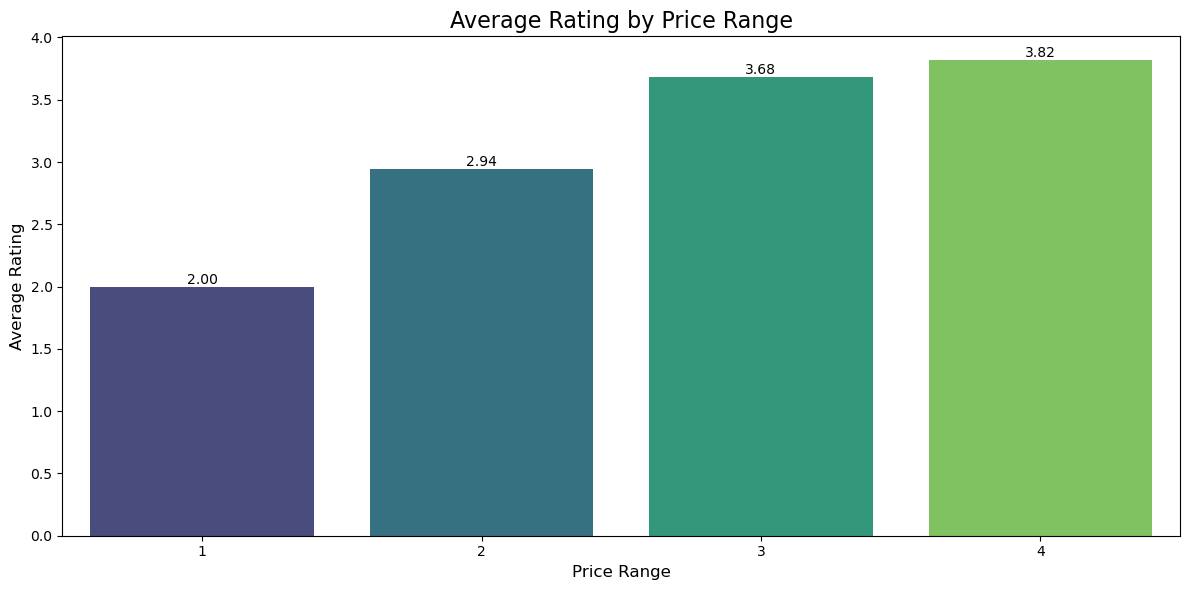

In [27]:
sorted_price_range_rating = price_range_rating.sort_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_price_range_rating.index, y=sorted_price_range_rating.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Average Rating by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
table_booking_rating = df.groupby('Has Table booking')['Aggregate rating'].mean()

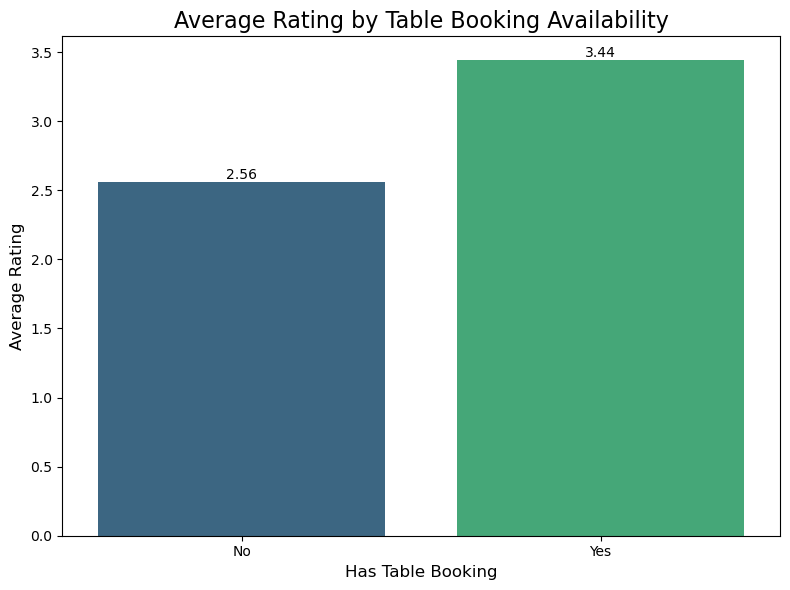

In [29]:
sorted_table_booking_rating = table_booking_rating.sort_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sorted_table_booking_rating.index, y=sorted_table_booking_rating.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Average Rating by Table Booking Availability', fontsize=16)
plt.xlabel('Has Table Booking', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [30]:
online_delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()

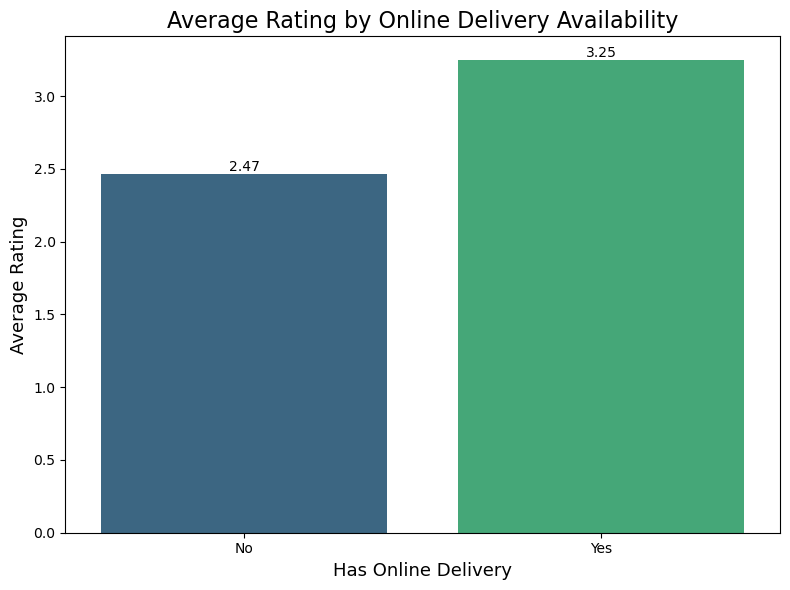

In [31]:
sorted_online_delivery_rating = online_delivery_rating.sort_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sorted_online_delivery_rating.index, y=sorted_online_delivery_rating.values, palette='viridis')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.title('Average Rating by Online Delivery Availability', fontsize=16)
plt.xlabel('Has Online Delivery', fontsize=13)
plt.ylabel('Average Rating', fontsize=13)
plt.tight_layout()
plt.show()

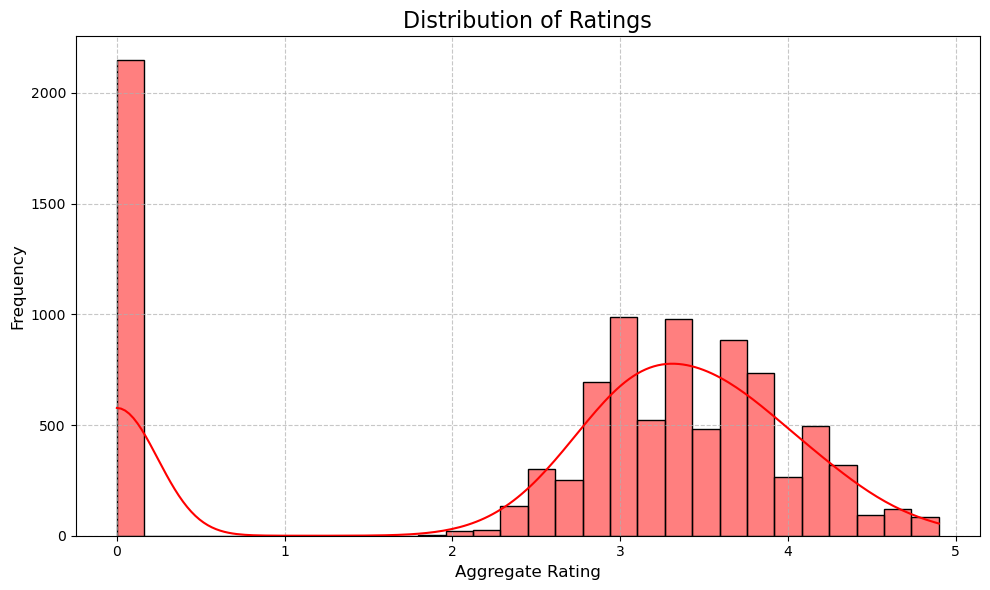

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='red', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

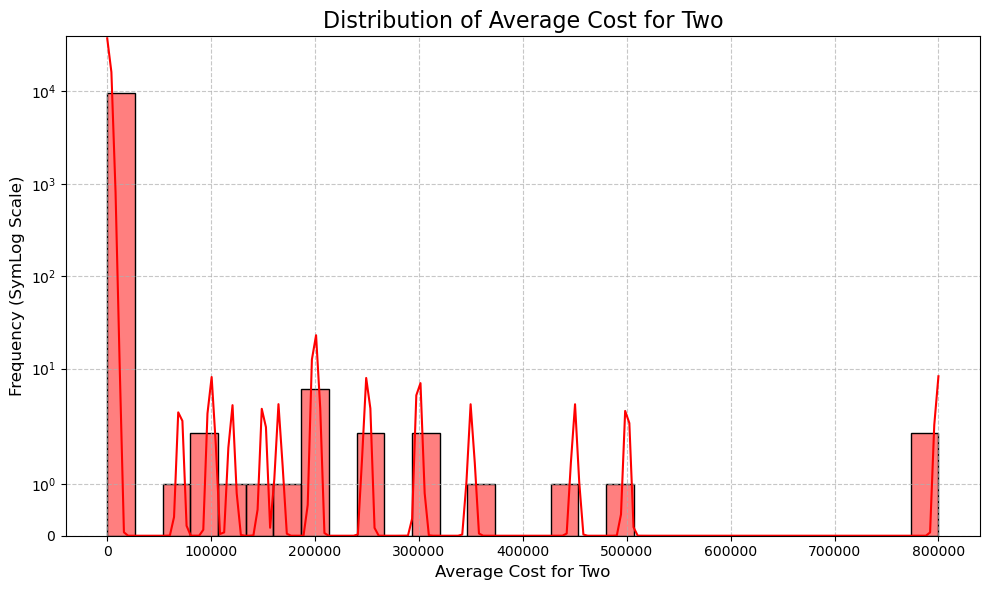

In [33]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Average Cost for two'], bins=30, kde=True, color='red', edgecolor='black')
ax.set_yscale('symlog')
plt.title('Distribution of Average Cost for Two', fontsize=16)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.ylabel('Frequency (SymLog Scale)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Task3: Data Visualization

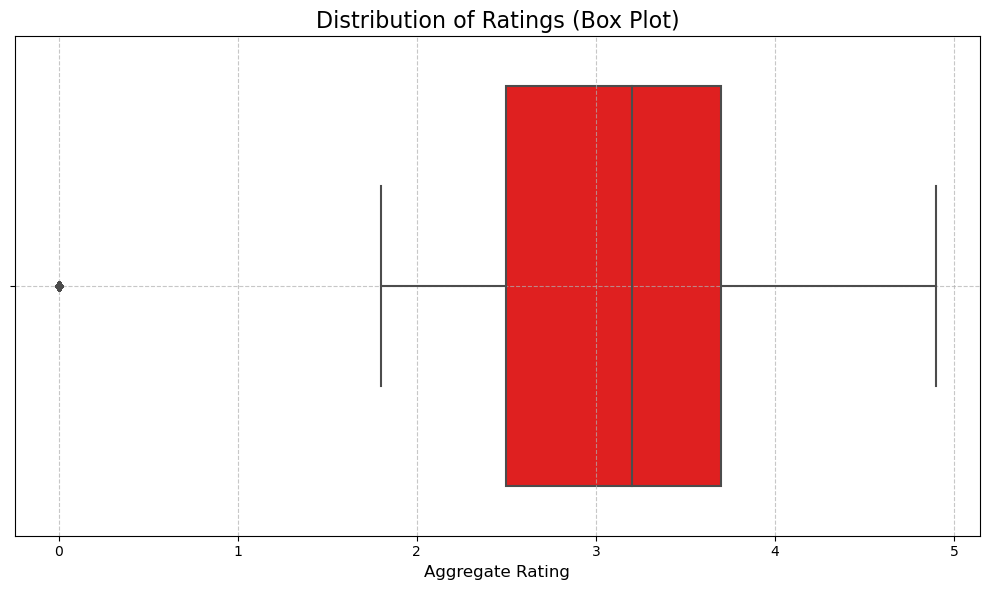

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df['Aggregate rating'], color='red')
plt.title('Distribution of Ratings (Box Plot)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

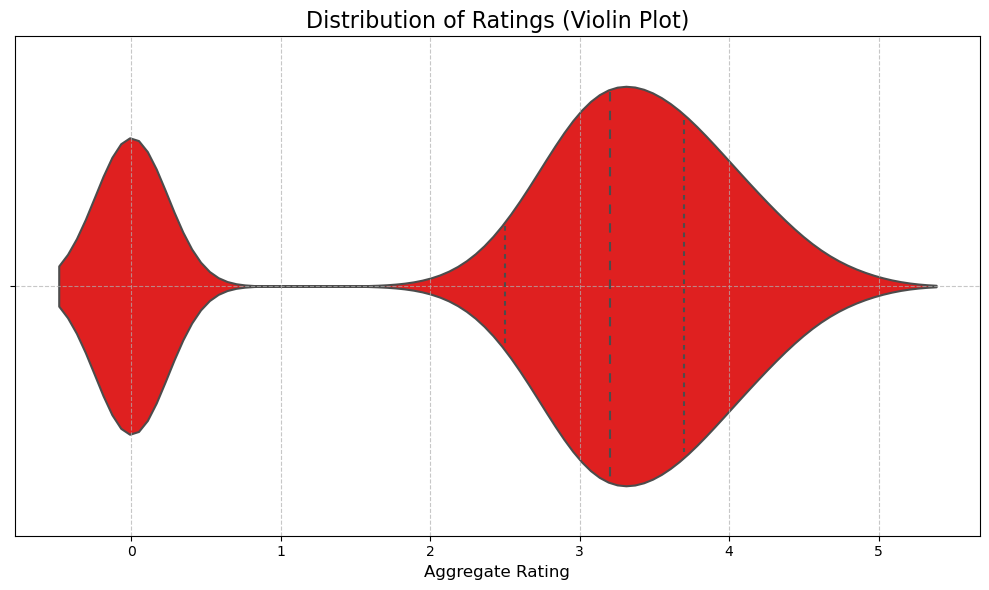

In [35]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['Aggregate rating'], color='red', inner='quartiles')
plt.title('Distribution of Ratings (Violin Plot)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
cuisine_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)[:10]

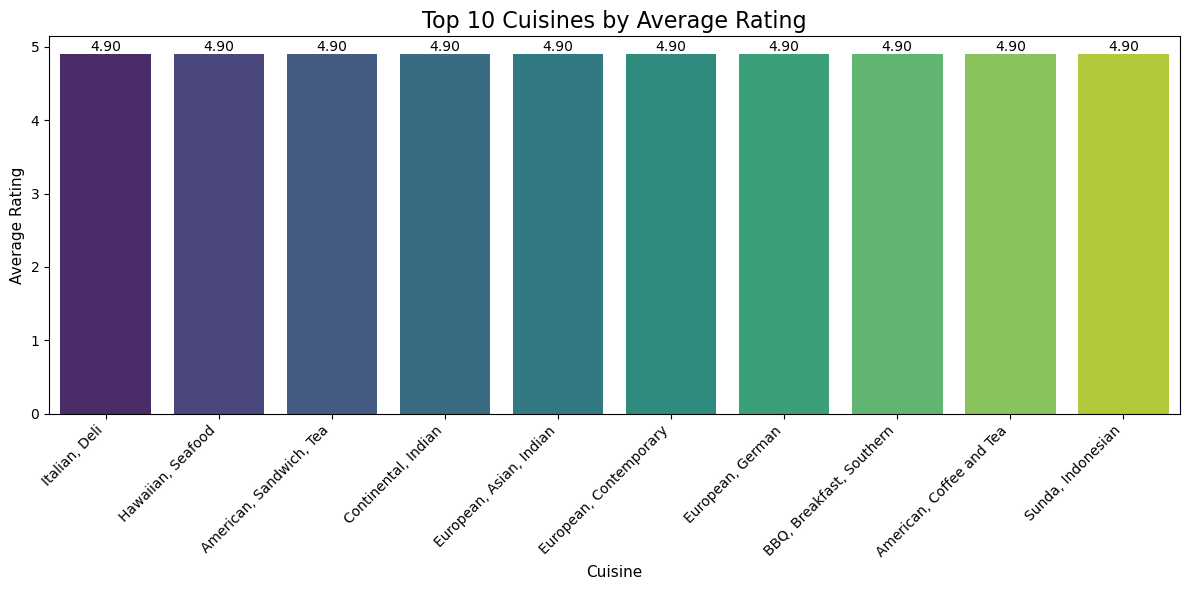

In [37]:
plt.figure(figsize=(12, 6))
sorted_cuisine_avg_rating = cuisine_avg_rating.sort_values(ascending=False).head(10)
ax = sns.barplot(x=sorted_cuisine_avg_rating.index, y=sorted_cuisine_avg_rating.values, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Cuisine', fontsize=11)
plt.ylabel('Average Rating', fontsize=11)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [38]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)[:10]

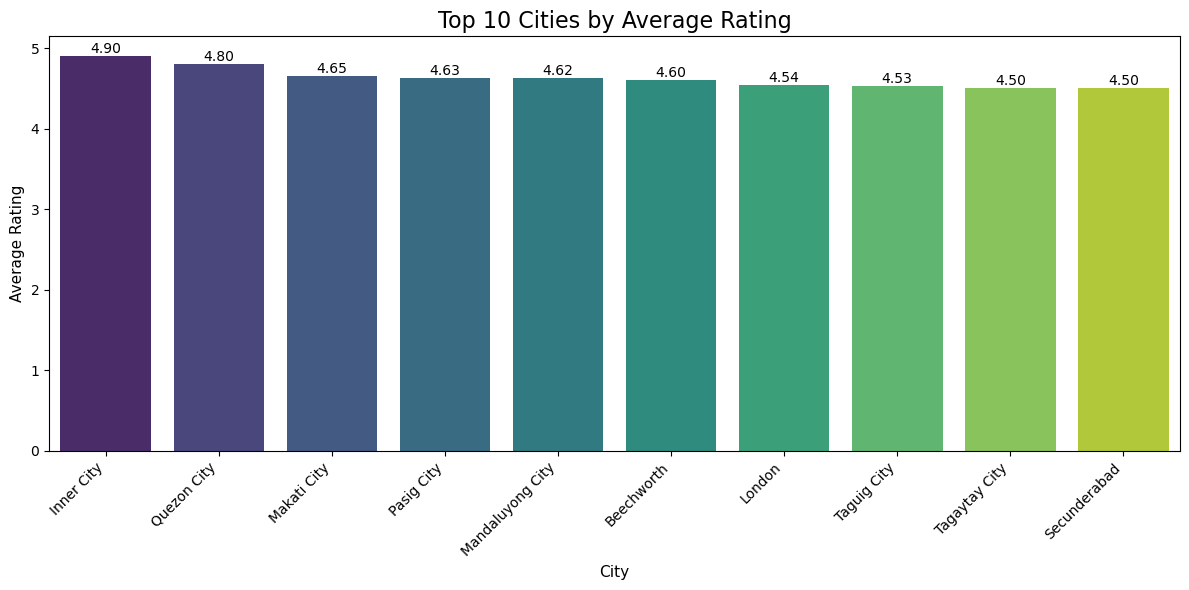

In [39]:
plt.figure(figsize=(12, 6))
sorted_city_avg_rating = city_avg_rating.sort_values(ascending=False).head(10)
ax = sns.barplot(x=sorted_city_avg_rating.index, y=sorted_city_avg_rating.values, palette='viridis')
plt.title('Top 10 Cities by Average Rating', fontsize=16)
plt.xlabel('City', fontsize=11)
plt.ylabel('Average Rating', fontsize=11)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

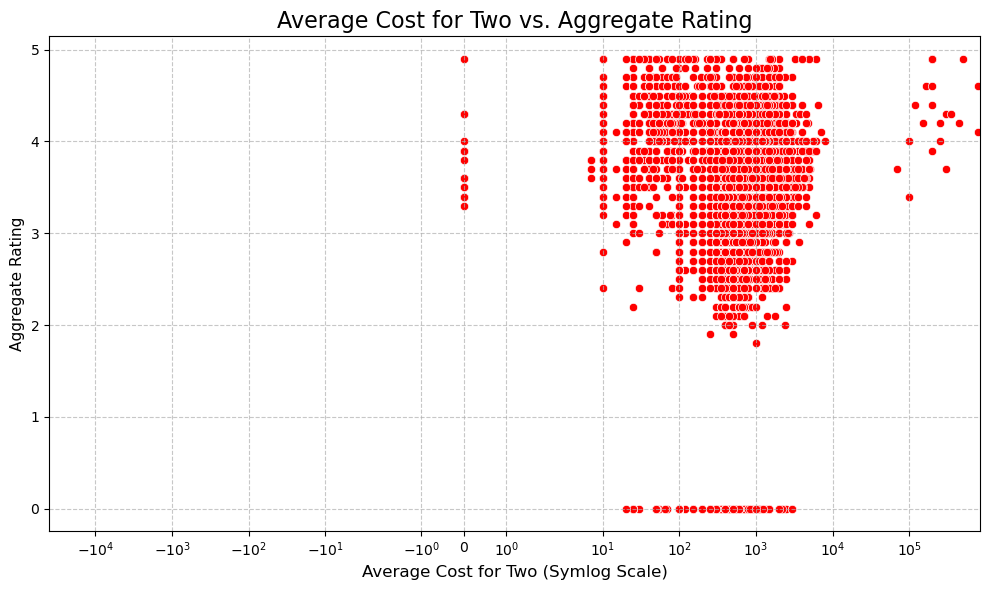

In [40]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, color='red')
ax.set_xscale('symlog')
plt.title('Average Cost for Two vs. Aggregate Rating', fontsize=16)
plt.xlabel('Average Cost for Two (Symlog Scale)', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

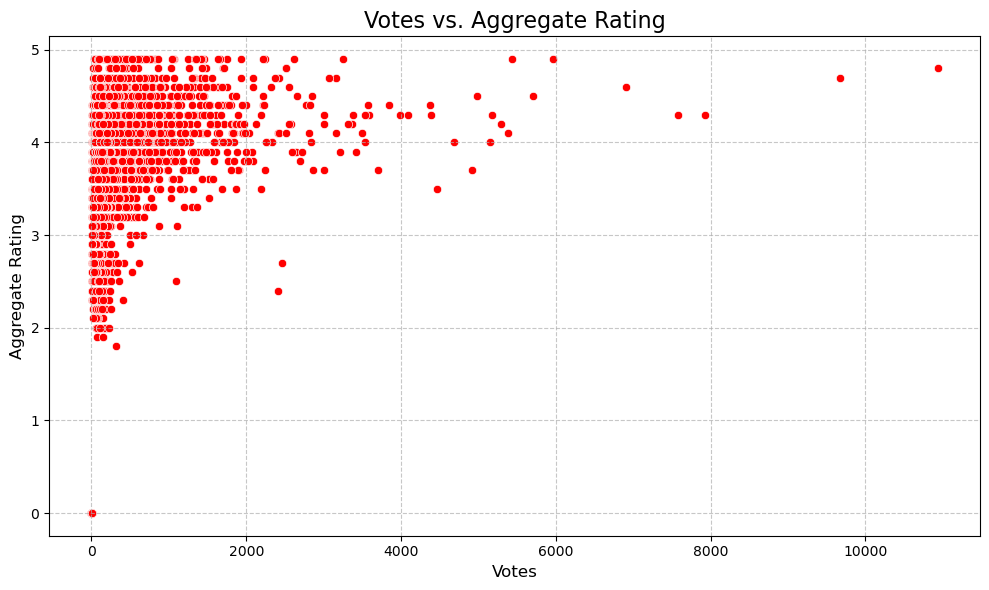

In [41]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Votes', y='Aggregate rating', data=df, color='red')
plt.title('Votes vs. Aggregate Rating', fontsize=16)
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
city_restaurant_count = df['City'].value_counts()[:10]

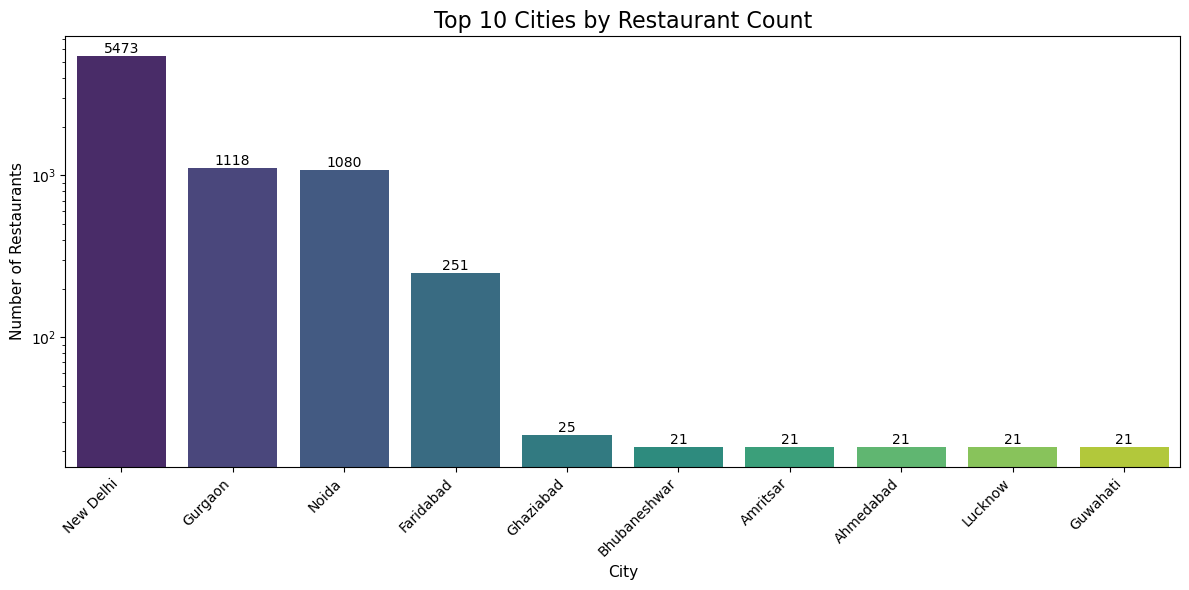

In [43]:
plt.figure(figsize=(12, 6))
sorted_city_restaurant_count = city_restaurant_count.sort_values(ascending=False).head(10)
ax = sns.barplot(x=sorted_city_restaurant_count.index, y=sorted_city_restaurant_count.values, palette='viridis')
ax.set_yscale('log')
plt.title('Top 10 Cities by Restaurant Count', fontsize=16)
plt.xlabel('City', fontsize=11)
plt.ylabel('Number of Restaurants', fontsize=11)
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

In [44]:
online_delivery_count = df['Has Online delivery'].value_counts()

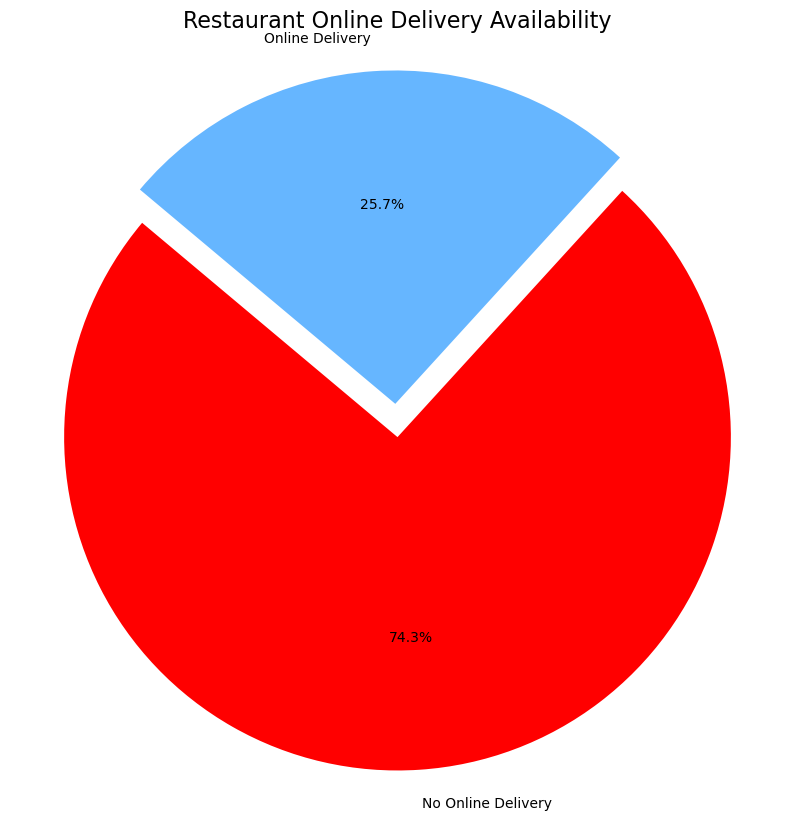

In [45]:
labels = ['No Online Delivery', 'Online Delivery']
colors = ['#ff0000', '#66b6ff']
explode = (0.1, 0)
plt.figure(figsize=(10, 10))
plt.pie(online_delivery_count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Restaurant Online Delivery Availability', fontsize=16)
plt.axis('equal')
plt.show()

In [46]:
table_booking_count = df['Has Table booking'].value_counts()

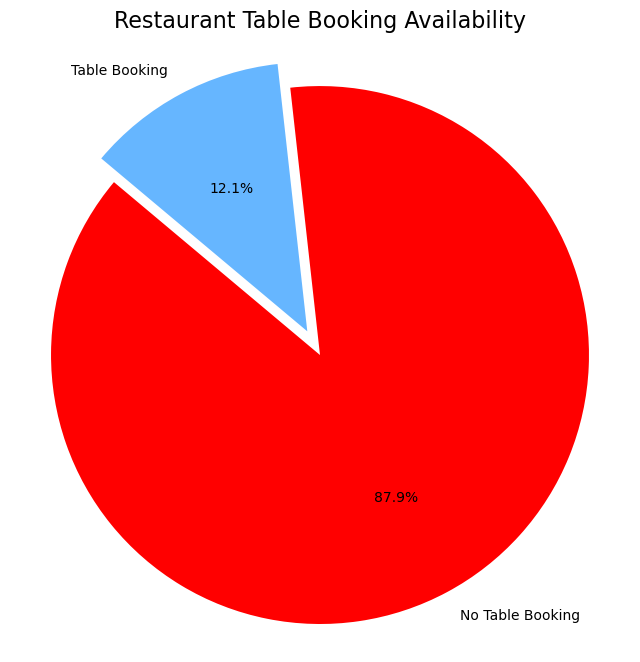

In [47]:
labels = ['No Table Booking', 'Table Booking']
colors = ['#ff0000', '#66b6ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(table_booking_count, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Restaurant Table Booking Availability', fontsize=16)
plt.axis('equal')
plt.show()